In [1]:
import numpy as np
import pandas as pd
from sys import float_info

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def parse_column(column):
    # expects a column vector of strings " (%f %f)"
    
    # remove whitespace and parentheses
    data = [c.strip()[1:-1] for c in column]
    
    # split
    data = [d.split(' ') for d in data]
    
    # convert to float array
    data = np.array([[float(d[0]), float(d[1])] for d in data])
    
    return data

In [17]:
def angle(v1, v2):
    denom = np.linalg.norm(v1) * np.linalg.norm(v2) + float_info.epsilon
    return np.arccos(np.dot(v1, v2) / denom) * 180 / np.pi

In [11]:
df = pd.read_csv('/home/mbeyeler/Downloads/2ndsight/12-005_Direction_of_Motion_3 months_20091007_1505_ON.csv')

In [12]:
labels = [d.strip() for d in df.columns]
print(labels)

['Trial Number', 'Speed(ms)', 'Line Width(pixels)', 'Contrast(%)', 'Motion Vector', 'Subject Response', 'Reaction Time(ms)', 'Device Status']


In [13]:
A = df.get_values()

In [14]:
raw_dir_stim = A[:, labels.index("Motion Vector")]
raw_dir_resp = A[:, labels.index("Subject Response")]

In [15]:
dir_stim = parse_column(raw_dir_stim)
dir_resp = parse_column(raw_dir_resp)

In [23]:
# stimulus direction per trial
trial_stim_dir = [np.arctan2(d[1], d[0])*180/np.pi for d in dir_stim]

# response direction per trial
trial_resp_dir = [np.arctan2(d[1], d[0])*180/np.pi for d in dir_resp]

# abs angle between stimulus direction and response direction
trial_angle = [angle(v1, v2) for v1, v2 in zip(dir_stim, dir_resp)]

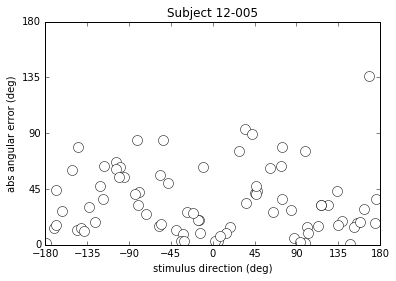

In [50]:
plt.plot(trial_stim_dir, trial_angle, 'ow', markersize=10)
plt.xlim(-180, 180)
plt.ylim(0, 180)
plt.xticks(np.arange(-180, 181, 45))
plt.yticks(np.arange(0, 181, 45))
plt.xlabel('stimulus direction (deg)')
plt.ylabel('abs angular error (deg)')
plt.title('Subject 12-005')
plt.savefig('ang_error.eps')
plt.savefig('ang_error.png')

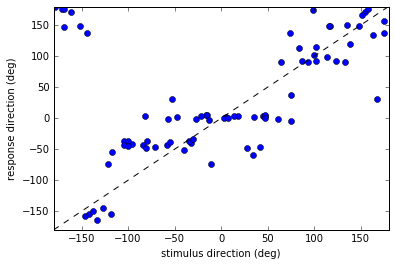

In [31]:
plt.plot(trial_stim_dir, trial_resp_dir, 'o')
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.plot([-180, 180], [-180, 180], '--k')
plt.xlabel('stimulus direction (deg)')
plt.ylabel('response direction (deg)')